In [1]:
import pandas as pd
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
hits_data = pd.read_csv("/Users/sarath/Documents/Detectify/data/hits.csv")
payouts = pd.read_csv("/Users/sarath/Documents/Detectify/data/payouts.csv")


In [3]:
hits_data.describe()

,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,...,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,79.000000,79.000000,...,82.00000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,187.173333,212.826667,217.466667,124.306667,151.266667,193.586667,269.226667,192.146667,229.227848,200.227848,...,874.45122,1343.317073,2015.695122,2141.987805,2590.47561,3250.865854,2377.463415,1238.768293,1561.414634,2241.390244
std,463.851571,524.716226,507.113808,323.224254,433.408407,471.503549,622.701385,474.416617,523.124880,478.436689,...,6713.70627,10458.918331,15578.148395,16170.689161,20220.40753,25884.498990,18849.623248,9894.112103,12335.084223,17679.716535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,12.500000,2.500000,2.000000,6.500000,5.500000,8.000000,3.000000,9.500000,...,0.25000,2.000000,5.250000,8.000000,7.00000,7.000000,4.000000,0.250000,2.000000,8.000000
50%,31.000000,30.000000,50.000000,13.000000,12.000000,22.000000,30.000000,36.000000,32.000000,45.000000,...,13.50000,17.000000,33.500000,40.500000,38.50000,34.000000,28.500000,11.000000,21.000000,32.000000
75%,143.000000,156.000000,133.000000,58.500000,69.500000,128.000000,169.500000,106.000000,178.000000,120.500000,...,36.75000,71.750000,142.000000,168.250000,136.00000,135.000000,99.500000,46.000000,84.250000,143.750000
max,3348.000000,3861.000000,3579.000000,1597.000000,2213.000000,2999.000000,3318.000000,3117.000000,3544.000000,3328.000000,...,60752.00000,94690.000000,141088.000000,146453.000000,183150.00000,234451.000000,170734.000000,89609.000000,111715.000000,160155.000000


In [4]:
hits_data.columns

Index(['module', 'technology', 'severity', '2019-03-01', '2019-03-02',
       '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
       '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
       '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17',
       '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
       '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26', '2019-03-27',
       '2019-03-28', '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
       '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-06',
       '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
       '2019-04-12', '2019-04-13', '2019-04-14', '2019-04-15', '2019-04-16',
       '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21',
       '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
       '2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30', '2019-05-01',
     

In [5]:
hits_data.shape

(82, 94)

In [8]:
hits_data.isna().sum()

module        0
technology    0
severity      0
2019-03-01    7
2019-03-02    7
2019-03-03    7
2019-03-04    7
2019-03-05    7
2019-03-06    7
2019-03-07    7
2019-03-08    7
2019-03-09    3
2019-03-10    3
2019-03-11    3
2019-03-12    3
2019-03-13    3
2019-03-14    3
2019-03-15    3
2019-03-16    3
2019-03-17    3
2019-03-18    3
2019-03-19    3
2019-03-20    3
2019-03-21    3
2019-03-22    1
2019-03-23    1
2019-03-24    1
2019-03-25    1
2019-03-26    1
2019-03-27    1
             ..
2019-05-01    0
2019-05-02    0
2019-05-03    0
2019-05-04    0
2019-05-05    0
2019-05-06    0
2019-05-07    0
2019-05-08    0
2019-05-09    0
2019-05-10    0
2019-05-11    0
2019-05-12    0
2019-05-13    0
2019-05-14    0
2019-05-15    0
2019-05-16    0
2019-05-17    0
2019-05-18    0
2019-05-19    0
2019-05-20    0
2019-05-21    0
2019-05-22    0
2019-05-23    0
2019-05-24    0
2019-05-25    0
2019-05-26    0
2019-05-27    0
2019-05-28    0
2019-05-29    0
2019-05-30    0
Length: 94, dtype: int64

In [3]:
payouts.describe()

,severity_low,severity_medium,severity_high,severity_critical
count,22.0,22.000000,22.000000,22.000000
mean,2.0,17.500000,51.363636,87.500000
std,0.0,3.700064,12.069424,18.500322
min,2.0,10.000000,30.000000,50.000000
25%,2.0,15.000000,40.000000,75.000000
50%,2.0,20.000000,60.000000,100.000000
75%,2.0,20.000000,60.000000,100.000000
max,2.0,20.000000,60.000000,100.000000


In [3]:
payouts['technology'] = payouts['technology'].astype('category')

In [4]:
payouts.describe()

,severity_low,severity_medium,severity_high,severity_critical
count,22.0,22.000000,22.000000,22.000000
mean,2.0,17.500000,51.363636,87.500000
std,0.0,3.700064,12.069424,18.500322
min,2.0,10.000000,30.000000,50.000000
25%,2.0,15.000000,40.000000,75.000000
50%,2.0,20.000000,60.000000,100.000000
75%,2.0,20.000000,60.000000,100.000000
max,2.0,20.000000,60.000000,100.000000


In [4]:
payouts['technology'].dtype

CategoricalDtype(categories=['ASP.NET', 'Adobe Experience Manager', 'Amazon Web services',
                  'Apache HTTP server', 'Apache Struts', 'Apache Tomcat',
                  'Atlassian Confluence', 'Atlassian Jira', 'CakePHP',
                  'Drupal', 'Episerver', 'Google Cloud Platform', 'Joomla',
                  'Laravel', 'Magento', 'Microsoft Azure', 'Microsoft IIS',
                  'NGINX', 'Node.js Express', 'Ruby on Rails', 'WooCommerce',
                  'WordPress'],
                 ordered=False)

In [17]:
payouts.dtypes

technology           category
severity_low            int64
severity_medium         int64
severity_high           int64
severity_critical       int64
dtype: object

In [5]:
payouts['technology'] = pd.factorize(payouts.technology)[0]

In [20]:
payouts.dtypes

technology           int64
severity_low         int64
severity_medium      int64
severity_high        int64
severity_critical    int64
dtype: object

In [6]:
hits_data['module'] = pd.factorize(hits_data.module)[0]

In [7]:
hits_data['technology'] = pd.factorize(hits_data.technology)[0]

In [8]:
hits_data['severity'] = pd.factorize(hits_data.severity)[0]

In [32]:
hits_data.dtypes

module          int64
technology      int64
severity        int64
2019-03-01    float64
2019-03-02    float64
2019-03-03    float64
2019-03-04    float64
2019-03-05    float64
2019-03-06    float64
2019-03-07    float64
2019-03-08    float64
2019-03-09    float64
2019-03-10    float64
2019-03-11    float64
2019-03-12    float64
2019-03-13    float64
2019-03-14    float64
2019-03-15    float64
2019-03-16    float64
2019-03-17    float64
2019-03-18    float64
2019-03-19    float64
2019-03-20    float64
2019-03-21    float64
2019-03-22    float64
2019-03-23    float64
2019-03-24    float64
2019-03-25    float64
2019-03-26    float64
2019-03-27    float64
               ...   
2019-05-01      int64
2019-05-02      int64
2019-05-03      int64
2019-05-04      int64
2019-05-05      int64
2019-05-06      int64
2019-05-07      int64
2019-05-08      int64
2019-05-09      int64
2019-05-10      int64
2019-05-11      int64
2019-05-12      int64
2019-05-13      int64
2019-05-14      int64
2019-05-15

In [ ]:
sns.pairplot(hits_data,hue='severity',palette='coolwarm')

In [ ]:
#Distribution of severity

/Users/sarath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sarath/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/sarath/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


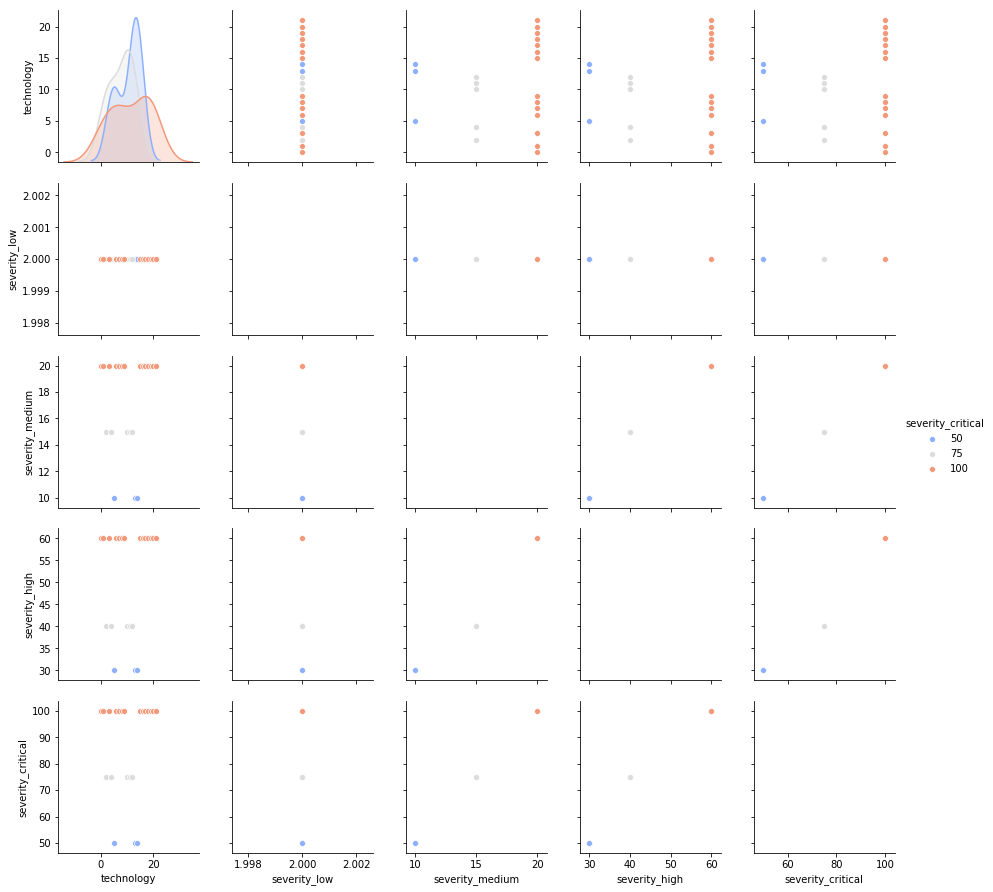

In [22]:
sns.pairplot(payouts,hue='severity_critical',palette='coolwarm')

In [9]:
tc = hits_data.corr()

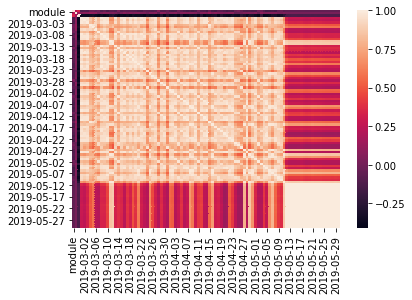

In [10]:
sns.heatmap(tc)

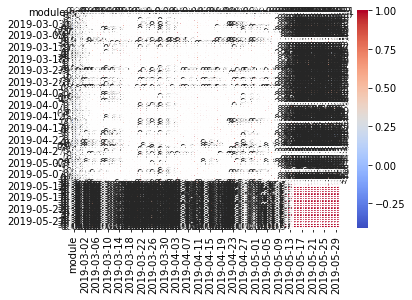

In [11]:
sns.heatmap(tc, annot =True, cmap='coolwarm')

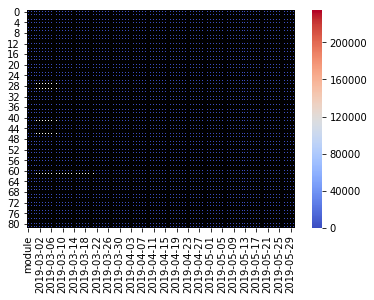

In [14]:
sns.heatmap(hits_data,cmap='coolwarm',linecolor='black',linewidths=1)

/Users/sarath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


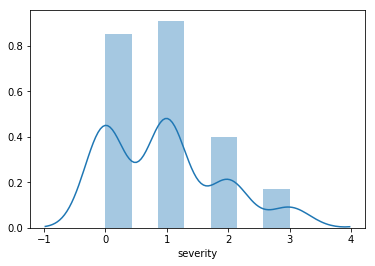

In [16]:
sns.distplot(hits_data['severity'])

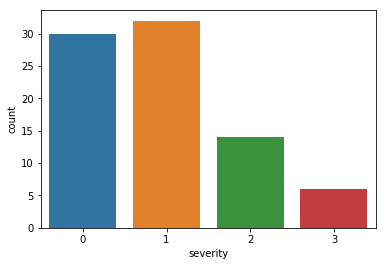

In [17]:
 sns.countplot(x ="severity",data= hits_data)

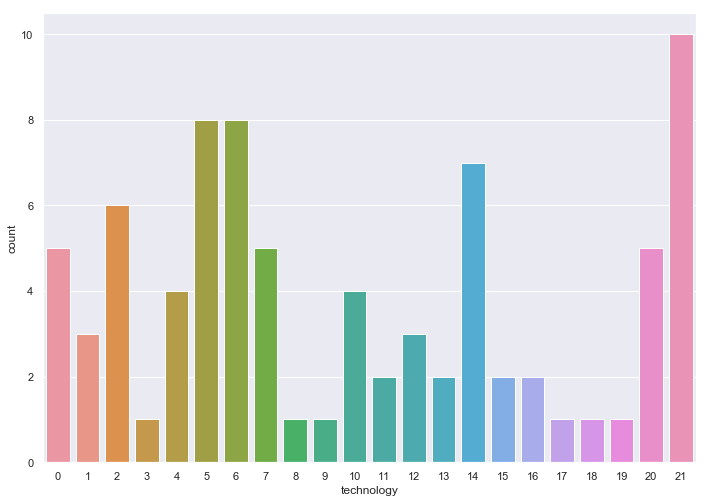

In [20]:
 sns.countplot(x ="technology",data= hits_data)

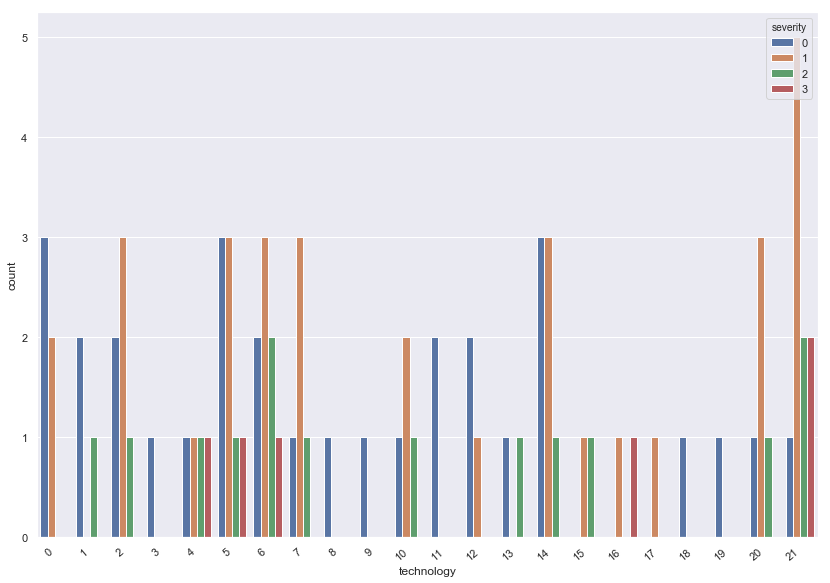

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x ="technology", data= hits_data, hue = 'severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

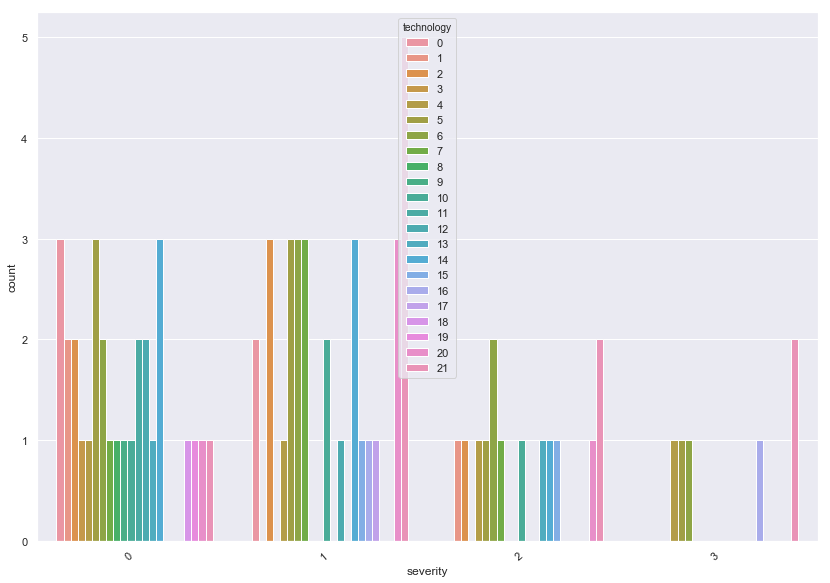

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x ="severity", data= hits_data, hue = 'technology')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

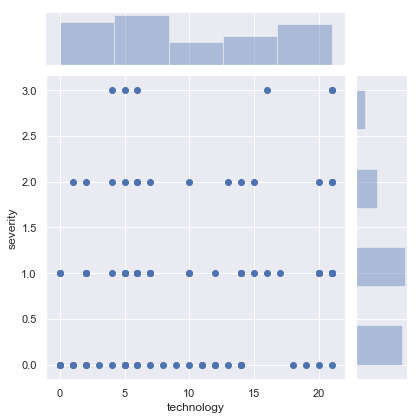

In [21]:
sns.jointplot(x= 'technology',y= 'severity', data=hits_data)

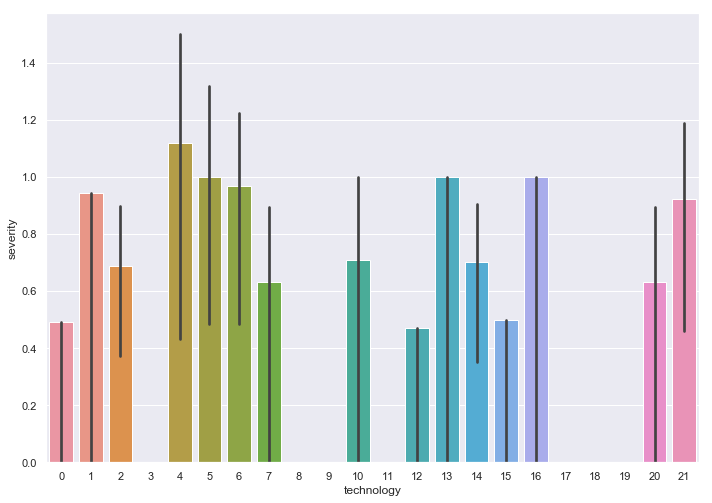

In [22]:
sns.barplot(x='technology', y='severity', data=hits_data,estimator=np.std)

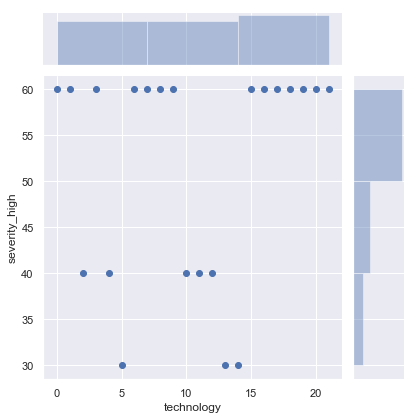

In [27]:
sns.jointplot(x= 'technology',y= 'severity_high', data=payouts)

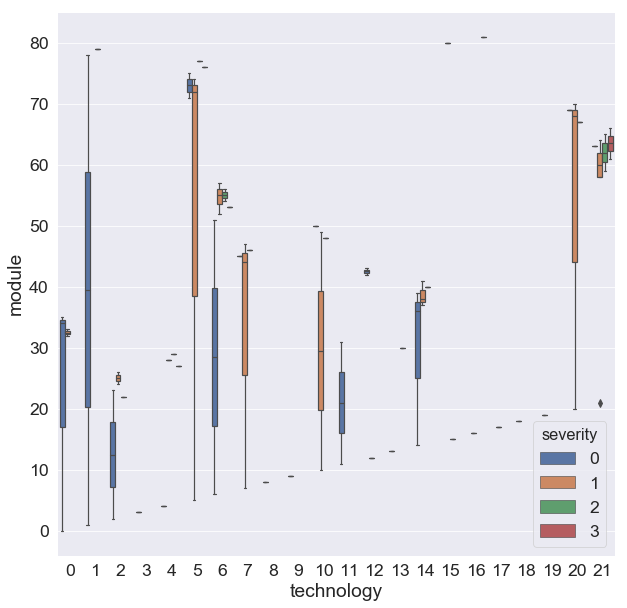

In [29]:
sns.set_context('paper',font_scale=2)
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10,10))

sns.boxplot(x='technology',y ='module', data=hits_data, hue ='severity')

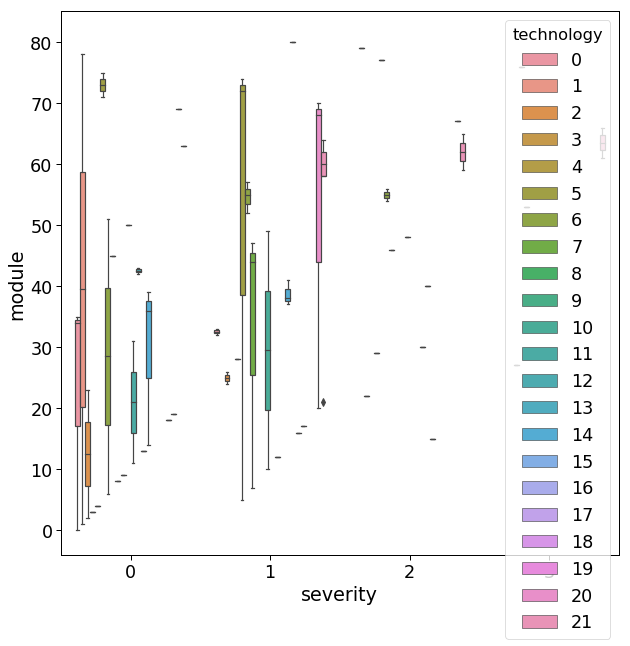

In [12]:
sns.set_context('paper',font_scale=2)
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10,10))

sns.boxplot(x='severity',y ='module', data=hits_data, hue ='technology')

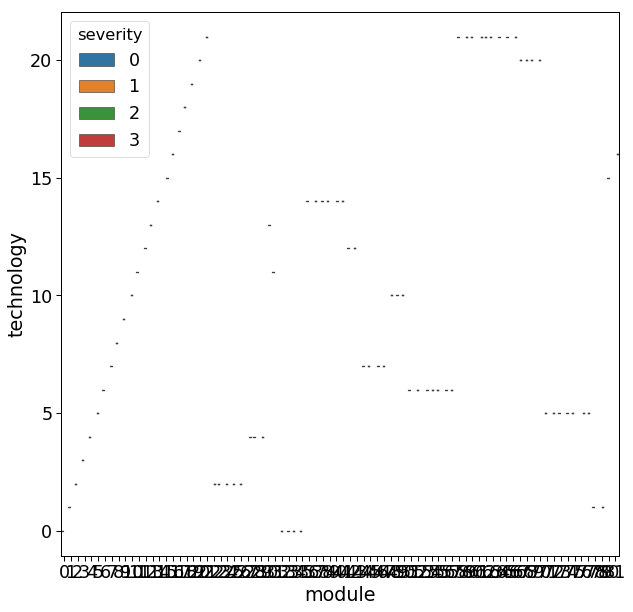

In [10]:
sns.set_context('paper',font_scale=2)
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10,10))

sns.boxplot(x='module',y ='technology', data=hits_data, hue ='severity')

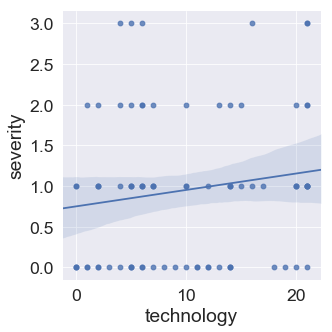

In [30]:
sns.lmplot(x='technology',y='severity',data=hits_data)

In [31]:
df = hits_data.corr()

In [32]:
df

,module,technology,severity,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,...,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30
module,1.000000,0.227603,0.346189,-0.100796,-0.091843,-0.106973,-0.019644,-0.011104,-0.043382,0.000487,...,-0.055173,-0.051829,-0.051128,-0.050342,-0.049750,-0.048825,-0.048735,-0.052254,-0.051527,-0.050994
technology,0.227603,1.000000,0.152499,0.055547,0.089838,0.077277,0.117729,0.104369,0.111137,0.007185,...,0.018952,0.017139,0.017240,0.019085,0.018461,0.015714,0.015440,0.018505,0.018894,0.018295
severity,0.346189,0.152499,1.000000,-0.365137,-0.369008,-0.373899,-0.353436,-0.326777,-0.369661,-0.401637,...,-0.135237,-0.133382,-0.134091,-0.132103,-0.129101,-0.130739,-0.131288,-0.130484,-0.130614,-0.130777
2019-03-01,-0.100796,0.055547,-0.365137,1.000000,0.974588,0.985586,0.846657,0.775146,0.932365,0.841756,...,0.297478,0.287855,0.284810,0.288808,0.280466,0.275381,0.275999,0.277514,0.279546,0.277426
2019-03-02,-0.091843,0.089838,-0.369008,0.974588,1.000000,0.971682,0.868593,0.779589,0.947358,0.822242,...,0.270679,0.260573,0.256706,0.259729,0.252390,0.247412,0.247819,0.251008,0.252924,0.249310
2019-03-03,-0.106973,0.077277,-0.373899,0.985586,0.971682,1.000000,0.836230,0.776876,0.913028,0.846559,...,0.343351,0.333415,0.330214,0.334336,0.326529,0.321036,0.321599,0.324138,0.325666,0.323190
2019-03-04,-0.019644,0.117729,-0.353436,0.846657,0.868593,0.836230,1.000000,0.962544,0.931486,0.710567,...,0.511319,0.504162,0.502699,0.505410,0.499368,0.495467,0.495912,0.498261,0.499045,0.497197
2019-03-05,-0.011104,0.104369,-0.326777,0.775146,0.779589,0.776876,0.962544,1.000000,0.879725,0.675971,...,0.596093,0.590376,0.588266,0.591110,0.587005,0.583508,0.583872,0.585306,0.585863,0.584597
2019-03-06,-0.043382,0.111137,-0.369661,0.932365,0.947358,0.913028,0.931486,0.879725,1.000000,0.821735,...,0.246675,0.237848,0.234781,0.238429,0.231541,0.226782,0.227343,0.229326,0.230930,0.228451
2019-03-07,0.000487,0.007185,-0.401637,0.841756,0.822242,0.846559,0.710567,0.675971,0.821735,1.000000,...,0.225381,0.220534,0.217651,0.220159,0.213939,0.213017,0.214350,0.209850,0.211120,0.209112


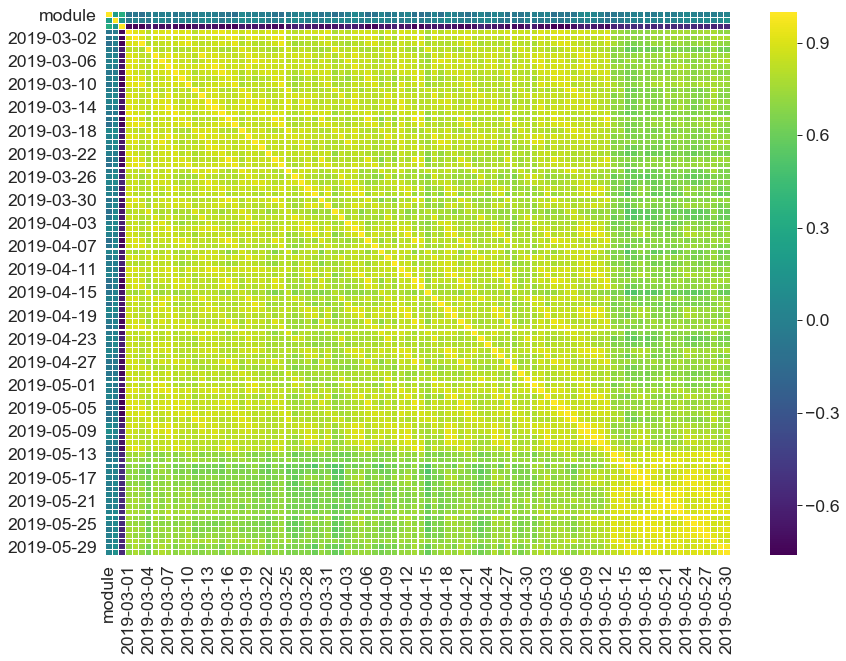

In [33]:
corrmat=hits_data.corr(method='spearman')
f,ax=plt.subplots(figsize=(14,10))
sns.heatmap(corrmat,ax=ax,cmap="viridis", linewidths=0.1)

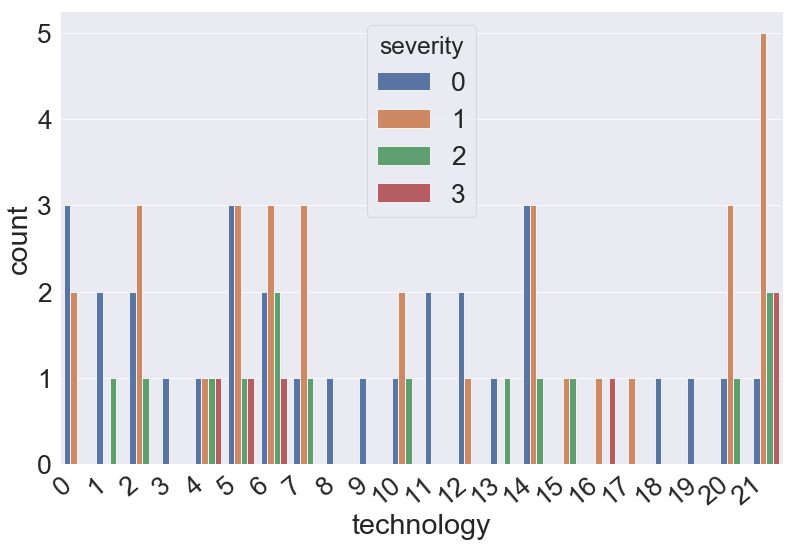

In [39]:
sns.set_context('paper',font_scale=3)
  
ax = sns.countplot(x ='technology',data= hits_data, hue= 'severity')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
def feature_info(feature):
    print('Unique values in the feature:',feature.unique())
    print('No of Null values:',feature.isna().sum())

In [41]:
feature_info(hits_data.severity)

Unique values in the feature: [0 1 2 3]
No of Null values: 0


/Users/sarath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


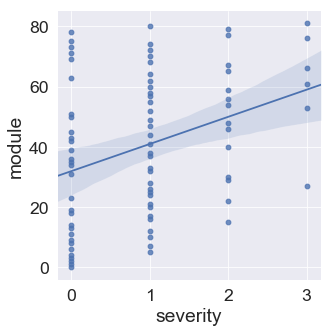

In [15]:
sns.lmplot(x='severity',y='module',data=hits_data)

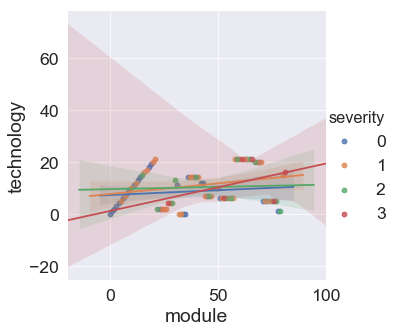

In [18]:
sns.lmplot(x='module',y='technology',data=hits_data,hue= 'severity')

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [26]:
scaler.fit(hits_data.drop('severity',axis=1))

/Users/sarath/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_features = scaler.transform(hits_data.drop('severity',axis=1))

/Users/sarath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [29]:
hits_data_feat = pd.DataFrame(scaled_features,columns=hits_data.columns[:-1])
hits_data_feat

,module,technology,severity,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,...,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29
0,-1.711055,-1.459568,0.027839,-0.007342,-0.245109,-0.228325,-0.198060,-0.233985,-0.149105,-0.204028,...,-0.125655,-0.126823,-0.127670,-0.129356,-0.126114,-0.124498,-0.124235,-0.122414,-0.125241,-0.125338
1,-1.668807,-1.313967,-0.399726,-0.394904,-0.413853,-0.387173,-0.342075,-0.404797,-0.428797,-0.390768,...,-0.131050,-0.129228,-0.130189,-0.133276,-0.128900,-0.126364,-0.126904,-0.125973,-0.127362,-0.127558
2,-1.626559,-1.168365,-0.338955,-0.377637,-0.374148,-0.356027,-0.274713,-0.366364,-0.347961,-0.291032,...,-0.127903,-0.119319,-0.120307,-0.126681,-0.123974,-0.122710,-0.123862,-0.123838,-0.122223,-0.120842
3,-1.584311,-1.022763,-0.384533,-0.389148,-0.366208,-0.368485,-0.342075,-0.404797,-0.423947,-0.390768,...,-0.130451,-0.128458,-0.129349,-0.132716,-0.128204,-0.125742,-0.126691,-0.125770,-0.126302,-0.126647
4,-1.542062,-0.877161,-0.378022,-0.400660,-0.405912,-0.387173,-0.351367,-0.411203,-0.433648,-0.380158,...,-0.130301,-0.128843,-0.129930,-0.131659,-0.127656,-0.125898,-0.125997,-0.125465,-0.127281,-0.127387
5,-1.499814,-0.731560,-0.367170,-0.350776,-0.378119,-0.368485,-0.332784,-0.400527,-0.422331,-0.403500,...,-0.127603,-0.125861,-0.128574,-0.131347,-0.127507,-0.125431,-0.125837,-0.124549,-0.126057,-0.126761
6,-1.457566,-0.585958,-0.150132,-0.189611,-0.205404,-0.327995,-0.121407,-0.195552,-0.077969,-0.076705,...,-0.131050,-0.128843,-0.127928,-0.131285,-0.128801,-0.126014,-0.126370,-0.125465,-0.126954,-0.125509
7,-1.415317,-0.440356,-0.241288,-0.289380,-0.272902,-0.324880,-0.286328,-0.323661,-0.268742,-0.310130,...,-0.126105,-0.124899,-0.121017,-0.120521,-0.120491,-0.120961,-0.122100,-0.123024,-0.123610,-0.119989
8,-1.373069,-0.294755,-0.139281,-0.180018,-0.205404,-0.253243,-0.253808,-0.180606,-0.249341,-0.172197,...,-0.118611,-0.118357,-0.118046,-0.120334,-0.119645,-0.119290,-0.120232,-0.119261,-0.119613,-0.118794
9,-1.330821,-0.149153,-0.330274,-0.318159,-0.159744,-0.334224,-0.323493,-0.351418,-0.346345,-0.318618,...,-0.127004,-0.125765,-0.126120,-0.128423,-0.125318,-0.121777,-0.122153,-0.123532,-0.123039,-0.123176


In [30]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,hits_data['severity'],
                                                    test_size=0.30)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').